In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [16]:
data=pd.read_csv("big_data.csv")

In [17]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [12]:
data.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [21]:
data.drop(['Item_Identifier', 'Item_Weight','Outlet_Identifier',
       'Outlet_Establishment_Year'],axis='columns',inplace=True)


In [22]:
data

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...
8518,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8519,Regular,0.046982,Baking Goods,108.1570,NaN,Tier 2,Supermarket Type1,549.2850
8520,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


In [23]:
data.isnull().sum()

Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [24]:
#Since Sale of items do not depend upon outlet size So we can drop Outlet Size Column
data.drop(['Outlet_Size'],axis='columns',inplace=True)

In [25]:
data

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...
8518,Low Fat,0.056783,Snack Foods,214.5218,Tier 3,Supermarket Type1,2778.3834
8519,Regular,0.046982,Baking Goods,108.1570,Tier 2,Supermarket Type1,549.2850
8520,Low Fat,0.035186,Health and Hygiene,85.1224,Tier 2,Supermarket Type1,1193.1136
8521,Regular,0.145221,Snack Foods,103.1332,Tier 3,Supermarket Type2,1845.5976


In [26]:
data.isnull().sum()

Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

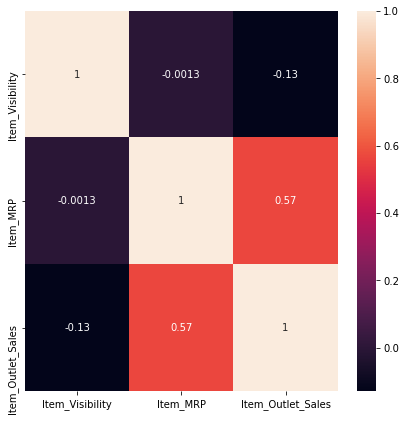

In [27]:
# correlation heatmap
import seaborn as sns
from matplotlib import pyplot as plt
corr_hmap=data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type',]
for val in list:
    data[val]=le.fit_transform(data[val].astype(str))

In [29]:
data

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,0.016047,4,249.8092,0,1,3735.1380
1,2,0.019278,14,48.2692,2,2,443.4228
2,1,0.016760,10,141.6180,0,1,2097.2700
3,2,0.000000,6,182.0950,2,0,732.3800
4,1,0.000000,9,53.8614,2,1,994.7052
...,...,...,...,...,...,...,...
8518,1,0.056783,13,214.5218,2,1,2778.3834
8519,2,0.046982,0,108.1570,1,1,549.2850
8520,1,0.035186,8,85.1224,1,1,1193.1136
8521,2,0.145221,13,103.1332,2,2,1845.5976


In [31]:
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3
print(np.where(z>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [32]:
data_new=data[(z<3).all(axis=1)] 

In [33]:
print(data.shape)
print(data_new.shape)

(8523, 7)
(8222, 7)


In [34]:
data=data_new
data.shape

(8222, 7)

In [35]:
data.skew()

Item_Fat_Content        0.291106
Item_Visibility         0.794506
Item_Type               0.094578
Item_MRP                0.139153
Outlet_Location_Type   -0.202794
Outlet_Type             0.957163
Item_Outlet_Sales       0.877476
dtype: float64

In [36]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])


In [37]:
data.skew()

Item_Fat_Content        0.291106
Item_Visibility         0.711512
Item_Type               0.094578
Item_MRP                0.139153
Outlet_Location_Type   -0.202794
Outlet_Type            -0.236229
Item_Outlet_Sales      -0.936422
dtype: float64

In [38]:
data1=data.drop(columns=['Item_Outlet_Sales'])
x=data1
y=data['Item_Outlet_Sales']

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 48 is 0.6211460883775803


In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

0.6046051232872713

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [47]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is:",r2_score(y_test,y_pred))
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.6211460883775803
RMSE is: 0.6262478848929113


In [52]:
 import joblib
joblib.dump(lreg,'bigdata.pkl')

['bigdata.pkl']